<a href="https://colab.research.google.com/github/drshahizan/Python-big-data/blob/main/Project/No%20Name/Project_BigData_NoName.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PROJECT (Compare Libraries): Amazon Book Reviews**

**Group 7**: No Name  


| Name | Matric No. |
| --- | ----------- |
| Madina Suraya Binti Zharin | A20EC0203 |
| Nur Izzah Mardhiah binti Rashidi | A20EC0116 |
| Tan Yong Sheng | 	A20EC0157 |
| Chloe Racquelmae Kennedy | A20EC0026 |  

**Amazon Book Reviews** dataset contain feedback about 3M user on 212404 unique books. The dataset contains product reviews and metadata from Amazon, including 142.8 million reviews spanning May 1996 - July 2014.This dataset was found from Kaggle and its size is 2.86 GB.

src: [Book_rating.csv](https://www.kaggle.com/datasets/mohamedbakhet/amazon-books-reviews?select=Books_rating.csv) <br>
The dataset contains 3000000 records and 10 columns which are:

| Features | Description |
| --- | ----------- |
| id | The Id of Book |
| Title | 	Book Title |
| Price | The price of Book |
| User_id | 	Id of the user who rates the book |
| profileName | 	Name of the user who rates the book |
| review/helpfulness | helpfulness rating of the review, e.g. 2/3 |  
| review/score | rating from 0 to 5 for the book |  
| review/time | time of given the review |  
| review/summary | the summary of a text review |  
| review/text | the full text of a review |    


We will be comparing three libraries which are **Pandas, PySpark, and Koalas.**

## **Downloading the Dataset**

First, mount drive into google colab.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Pandas**

In [2]:
import pandas as pd

In [3]:
import time
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
from wordcloud import WordCloud

**PySpark**

In [30]:
!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.4/281.4 MB 5.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.7/199.7 KB 19.2 MB/s eta 0:00:00
  Created wheel for pyspark: filename=pyspark-3.3.1-py2.py3-none-any.whl size=281845512 sha256=6750b9a8f4adadc2ba318e94c2dc4524c92f1c375f9cfad857c5a94c0a4b3118
  Stored in directory: /root/.cache/pip/wheels/43/dc/11/ec201cd671da62fa9c5cc77078235e40722170ceba231d7598
Successfully built pyspark


In [31]:
from pyspark.sql.functions import col, desc, split, mean, avg, count

In [32]:
from pyspark.sql import SparkSession

In [33]:
spark = SparkSession \
    .builder \
    .appName("project_bigdata") \
    .getOrCreate()

**Koalas**

In [69]:
!pip install koalas
# to use koalas, PySpark library need to be installed, too

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.8/390.8 KB 7.5 MB/s eta 0:00:00


In [70]:
from pyspark.sql import SparkSession
from databricks import koalas as ks

## **Load Dataset**

In [4]:
filename = '/content/drive/MyDrive/Colab Notebooks/Project/Books_rating.csv'

In [5]:
# PANDAS
%%time
pd_df = pd.read_csv(filename)
pd_df.head()

CPU times: user 33.8 s, sys: 4.82 s, total: 38.6 s
Wall time: 59.4 s


Id                           Title  Price         User_id  \
0  1882931173  Its Only Art If Its Well Hung!    NaN   AVCGYZL8FQQTD   
1  0826414346        Dr. Seuss: American Icon    NaN  A30TK6U7DNS82R   
2  0826414346        Dr. Seuss: American Icon    NaN  A3UH4UZ4RSVO82   
3  0826414346        Dr. Seuss: American Icon    NaN  A2MVUWT453QH61   
4  0826414346        Dr. Seuss: American Icon    NaN  A22X4XUPKF66MR   

                          profileName review/helpfulness  review/score  \
0               Jim of Oz "jim-of-oz"                7/7           4.0   
1                       Kevin Killian              10/10           5.0   
2                        John Granger              10/11           5.0   
3  Roy E. Perry "amateur philosopher"                7/7           4.0   
4     D. H. Richards "ninthwavestore"                3/3           4.0   

   review/time                                   review/summary  \
0    940636800           Nice collection of Julie Strain images   
1   1095724800                                Really Enjoyed It   
2   1078790400  Essential for every personal and Public Library   
3   1090713600  Phlip Nel gives silly Seuss a serious treatment   
4   1107993600                           Good academic overview   

                                         review/text  
0  This is only for Julie Strain fans. It's a col...  
1  I don't care much for Dr. Seuss but after read...  
2  If people become the books they read and if "t...  
3  Theodore Seuss Geisel (1904-1991), aka &quot;D...  
4  Philip Nel - Dr. Seuss: American IconThis is b...

In [34]:
# PySpark
%%time
ps_df = spark.read.csv(filename, header=True)
ps_df.show(5)

+----------+--------------------+-----+--------------+--------------------+------------------+------------+-----------+--------------------+--------------------+
|        Id|               Title|Price|       User_id|         profileName|review/helpfulness|review/score|review/time|      review/summary|         review/text|
+----------+--------------------+-----+--------------+--------------------+------------------+------------+-----------+--------------------+--------------------+
|1882931173|Its Only Art If I...| null| AVCGYZL8FQQTD|"Jim of Oz ""jim-...|               7/7|         4.0|  940636800|Nice collection o...|This is only for ...|
|0826414346|Dr. Seuss: Americ...| null|A30TK6U7DNS82R|       Kevin Killian|             10/10|         5.0| 1095724800|   Really Enjoyed It|I don't care much...|
|0826414346|Dr. Seuss: Americ...| null|A3UH4UZ4RSVO82|        John Granger|             10/11|         5.0| 1078790400|Essential for eve...|"If people become...|
|0826414346|Dr. Seuss: Ameri

In [71]:
# KOALAS
%%time
k_df = ks.DataFrame(ps_df)
k_df.head()

CPU times: user 97.5 ms, sys: 13.8 ms, total: 111 ms
Wall time: 941 ms


Id                           Title Price         User_id                             profileName review/helpfulness review/score review/time                                   review/summary                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     review/text
0  1882931173  Its Only Art If Its Well Hung!  None   AVCGYZL8FQQTD               "Jim of Oz ""jim-of-oz"""                7/7          4.0   9406

# **Data Preparation and Cleaning**

**Get information of dataframe before cleaning**

In [6]:
# PANDAS
%%time
pd_df.dtypes

CPU times: user 449 µs, sys: 66 µs, total: 515 µs
Wall time: 499 µs


Id                     object
Title                  object
Price                 float64
User_id                object
profileName            object
review/helpfulness     object
review/score          float64
review/time             int64
review/summary         object
review/text            object
dtype: object

In [35]:
# PySpark
%%time
ps_df.printSchema()

root
 |-- Id: string (nullable = true)
 |-- Title: string (nullable = true)
 |-- Price: string (nullable = true)
 |-- User_id: string (nullable = true)
 |-- profileName: string (nullable = true)
 |-- review/helpfulness: string (nullable = true)
 |-- review/score: string (nullable = true)
 |-- review/time: string (nullable = true)
 |-- review/summary: string (nullable = true)
 |-- review/text: string (nullable = true)

CPU times: user 3.98 ms, sys: 0 ns, total: 3.98 ms
Wall time: 65.8 ms


In [72]:
# KOALAS
%%time
k_df.dtypes

CPU times: user 19.7 ms, sys: 2.23 ms, total: 21.9 ms
Wall time: 85.6 ms


Id                    object
Title                 object
Price                 object
User_id               object
profileName           object
review/helpfulness    object
review/score          object
review/time           object
review/summary        object
review/text           object
dtype: object

**Get shape before cleaning**

In [7]:
# PANDAS
%%time
pd_df.shape

CPU times: user 27 µs, sys: 4 µs, total: 31 µs
Wall time: 34.6 µs


(3000000, 10)

In [36]:
# PySpark
%%time
num_rows_ps = ps_df.count()
num_columns_ps = len(ps_df.columns)
print("Shape of DataFrame PySpark:", num_rows_ps, num_columns_ps)

Shape of DataFrame PySpark: 3000000 10
CPU times: user 202 ms, sys: 19.7 ms, total: 222 ms
Wall time: 34.7 s


In [73]:
# KOALAS
%%time
k_df.shape

CPU times: user 124 ms, sys: 14.7 ms, total: 138 ms
Wall time: 19.7 s


(3000000, 10)

**Drop columns**

In [8]:
# PANDAS
%%time
pd_df = pd_df.drop(columns=['Price','review/time'])
pd_df.head()

CPU times: user 260 ms, sys: 0 ns, total: 260 ms
Wall time: 265 ms


Id                           Title         User_id  \
0  1882931173  Its Only Art If Its Well Hung!   AVCGYZL8FQQTD   
1  0826414346        Dr. Seuss: American Icon  A30TK6U7DNS82R   
2  0826414346        Dr. Seuss: American Icon  A3UH4UZ4RSVO82   
3  0826414346        Dr. Seuss: American Icon  A2MVUWT453QH61   
4  0826414346        Dr. Seuss: American Icon  A22X4XUPKF66MR   

                          profileName review/helpfulness  review/score  \
0               Jim of Oz "jim-of-oz"                7/7           4.0   
1                       Kevin Killian              10/10           5.0   
2                        John Granger              10/11           5.0   
3  Roy E. Perry "amateur philosopher"                7/7           4.0   
4     D. H. Richards "ninthwavestore"                3/3           4.0   

                                    review/summary  \
0           Nice collection of Julie Strain images   
1                                Really Enjoyed It   
2  Essential for every personal and Public Library   
3  Phlip Nel gives silly Seuss a serious treatment   
4                           Good academic overview   

                                         review/text  
0  This is only for Julie Strain fans. It's a col...  
1  I don't care much for Dr. Seuss but after read...  
2  If people become the books they read and if "t...  
3  Theodore Seuss Geisel (1904-1991), aka &quot;D...  
4  Philip Nel - Dr. Seuss: American IconThis is b...

In [37]:
# PySpark
%%time
clean_ps_df = ps_df.drop('Price','review/time')
clean_ps_df.show(5)

+----------+--------------------+--------------+--------------------+------------------+------------+--------------------+--------------------+
|        Id|               Title|       User_id|         profileName|review/helpfulness|review/score|      review/summary|         review/text|
+----------+--------------------+--------------+--------------------+------------------+------------+--------------------+--------------------+
|1882931173|Its Only Art If I...| AVCGYZL8FQQTD|"Jim of Oz ""jim-...|               7/7|         4.0|Nice collection o...|This is only for ...|
|0826414346|Dr. Seuss: Americ...|A30TK6U7DNS82R|       Kevin Killian|             10/10|         5.0|   Really Enjoyed It|I don't care much...|
|0826414346|Dr. Seuss: Americ...|A3UH4UZ4RSVO82|        John Granger|             10/11|         5.0|Essential for eve...|"If people become...|
|0826414346|Dr. Seuss: Americ...|A2MVUWT453QH61|"Roy E. Perry ""a...|               7/7|         4.0|Phlip Nel gives s...|Theodore Seuss

In [74]:
# KOALAS
%%time
if "Price" in k_df.columns:
    k_df = k_df.drop("Price")
if "review/time" in k_df.columns:
    k_df = k_df.drop("review/time")

CPU times: user 101 ms, sys: 8.88 ms, total: 109 ms
Wall time: 733 ms


**Drop null rows**

In [9]:
# PANDAS
%%time
pd_df = pd_df.dropna(subset=['Title', 'review/summary', 'review/text'])
pd_df.head()

CPU times: user 1.31 s, sys: 214 ms, total: 1.52 s
Wall time: 1.53 s


Id                           Title         User_id  \
0  1882931173  Its Only Art If Its Well Hung!   AVCGYZL8FQQTD   
1  0826414346        Dr. Seuss: American Icon  A30TK6U7DNS82R   
2  0826414346        Dr. Seuss: American Icon  A3UH4UZ4RSVO82   
3  0826414346        Dr. Seuss: American Icon  A2MVUWT453QH61   
4  0826414346        Dr. Seuss: American Icon  A22X4XUPKF66MR   

                          profileName review/helpfulness  review/score  \
0               Jim of Oz "jim-of-oz"                7/7           4.0   
1                       Kevin Killian              10/10           5.0   
2                        John Granger              10/11           5.0   
3  Roy E. Perry "amateur philosopher"                7/7           4.0   
4     D. H. Richards "ninthwavestore"                3/3           4.0   

                                    review/summary  \
0           Nice collection of Julie Strain images   
1                                Really Enjoyed It   
2  Essential for every personal and Public Library   
3  Phlip Nel gives silly Seuss a serious treatment   
4                           Good academic overview   

                                         review/text  
0  This is only for Julie Strain fans. It's a col...  
1  I don't care much for Dr. Seuss but after read...  
2  If people become the books they read and if "t...  
3  Theodore Seuss Geisel (1904-1991), aka &quot;D...  
4  Philip Nel - Dr. Seuss: American IconThis is b...

In [38]:
# PySpark
%%time
clean_ps_df = clean_ps_df.dropna(subset=['Title', 'review/summary', 'review/text'])
clean_ps_df.show(5)

+----------+--------------------+--------------+--------------------+------------------+------------+--------------------+--------------------+
|        Id|               Title|       User_id|         profileName|review/helpfulness|review/score|      review/summary|         review/text|
+----------+--------------------+--------------+--------------------+------------------+------------+--------------------+--------------------+
|1882931173|Its Only Art If I...| AVCGYZL8FQQTD|"Jim of Oz ""jim-...|               7/7|         4.0|Nice collection o...|This is only for ...|
|0826414346|Dr. Seuss: Americ...|A30TK6U7DNS82R|       Kevin Killian|             10/10|         5.0|   Really Enjoyed It|I don't care much...|
|0826414346|Dr. Seuss: Americ...|A3UH4UZ4RSVO82|        John Granger|             10/11|         5.0|Essential for eve...|"If people become...|
|0826414346|Dr. Seuss: Americ...|A2MVUWT453QH61|"Roy E. Perry ""a...|               7/7|         4.0|Phlip Nel gives s...|Theodore Seuss

In [75]:
# KOALAS
%%time
k_df = k_df.dropna(subset=['Title', 'review/summary', 'review/text'])
k_df.head()

CPU times: user 122 ms, sys: 22.4 ms, total: 144 ms
Wall time: 973 ms


Id                           Title         User_id                             profileName review/helpfulness review/score                                   review/summary                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     review/text
0  1882931173  Its Only Art If Its Well Hung!   AVCGYZL8FQQTD               "Jim of Oz ""jim-of-oz"""                7/7          4.0           Nice collection of J

- Since there are 90% records in **Price** column are null, we drop the column.
- Drop rows with null in **Title**, **review/summary** and **review/text**.
- Since only 20% records of **User_id** and **ProfileName** are null, we keep the columns and null value are acceptable.

**Drop duplicated rows**

In [10]:
# PANDAS
%%time
pd_df = pd_df.drop_duplicates()

CPU times: user 14.4 s, sys: 255 ms, total: 14.7 s
Wall time: 14.7 s


In [39]:
# PySpark
%%time
clean_ps_df = clean_ps_df.dropDuplicates()

CPU times: user 2.26 ms, sys: 19 µs, total: 2.27 ms
Wall time: 24.8 ms


In [76]:
# KOALAS
%%time
k_df.drop_duplicates

CPU times: user 12 µs, sys: 1 µs, total: 13 µs
Wall time: 18.4 µs


<bound method DataFrame.drop_duplicates of              Id                                                                                                                                        Title                User_id                                           profileName            review/helpfulness review/score                                                                           review/summary                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                

**Change data type**

In [11]:
# PANDAS
%%time
pd_df['review/score'] = pd.to_numeric(pd_df['review/score'], errors='coerce')

CPU times: user 12.7 ms, sys: 0 ns, total: 12.7 ms
Wall time: 13.4 ms


<timed exec>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [40]:
# PySpark
%%time
clean_ps_df = clean_ps_df.withColumn("review/score", col("review/score").cast("float"))

CPU times: user 3.92 ms, sys: 690 µs, total: 4.61 ms
Wall time: 89 ms


In [77]:
# KOALAS
%%time
k_df["review/score"] = k_df["review/score"].astype("float64")

CPU times: user 33.6 ms, sys: 5.6 ms, total: 39.2 ms
Wall time: 212 ms


**Get information of dataframe after cleaning**

In [12]:
# PANDAS
%%time
pd_df.dtypes

CPU times: user 305 µs, sys: 34 µs, total: 339 µs
Wall time: 349 µs


Id                     object
Title                  object
User_id                object
profileName            object
review/helpfulness     object
review/score          float64
review/summary         object
review/text            object
dtype: object

In [41]:
# PySpark
%%time
clean_ps_df.printSchema()

root
 |-- Id: string (nullable = true)
 |-- Title: string (nullable = true)
 |-- User_id: string (nullable = true)
 |-- profileName: string (nullable = true)
 |-- review/helpfulness: string (nullable = true)
 |-- review/score: float (nullable = true)
 |-- review/summary: string (nullable = true)
 |-- review/text: string (nullable = true)

CPU times: user 1.85 ms, sys: 1.08 ms, total: 2.93 ms
Wall time: 6.81 ms


In [78]:
# KOALAS
%%time
k_df.dtypes

CPU times: user 13.9 ms, sys: 4.37 ms, total: 18.3 ms
Wall time: 60 ms


Id                     object
Title                  object
User_id                object
profileName            object
review/helpfulness     object
review/score          float64
review/summary         object
review/text            object
dtype: object

## **Clean Dataset**

In [13]:
# PANDAS
%%time
pd_df.head()

CPU times: user 154 µs, sys: 18 µs, total: 172 µs
Wall time: 179 µs


Id                           Title         User_id  \
0  1882931173  Its Only Art If Its Well Hung!   AVCGYZL8FQQTD   
1  0826414346        Dr. Seuss: American Icon  A30TK6U7DNS82R   
2  0826414346        Dr. Seuss: American Icon  A3UH4UZ4RSVO82   
3  0826414346        Dr. Seuss: American Icon  A2MVUWT453QH61   
4  0826414346        Dr. Seuss: American Icon  A22X4XUPKF66MR   

                          profileName review/helpfulness  review/score  \
0               Jim of Oz "jim-of-oz"                7/7           4.0   
1                       Kevin Killian              10/10           5.0   
2                        John Granger              10/11           5.0   
3  Roy E. Perry "amateur philosopher"                7/7           4.0   
4     D. H. Richards "ninthwavestore"                3/3           4.0   

                                    review/summary  \
0           Nice collection of Julie Strain images   
1                                Really Enjoyed It   
2  Essential for every personal and Public Library   
3  Phlip Nel gives silly Seuss a serious treatment   
4                           Good academic overview   

                                         review/text  
0  This is only for Julie Strain fans. It's a col...  
1  I don't care much for Dr. Seuss but after read...  
2  If people become the books they read and if "t...  
3  Theodore Seuss Geisel (1904-1991), aka &quot;D...  
4  Philip Nel - Dr. Seuss: American IconThis is b...

In [42]:
# PySpark
%%time
clean_ps_df.show(5)

+----------+--------------------+--------------+--------------------+------------------+------------+--------------------+--------------------+
|        Id|               Title|       User_id|         profileName|review/helpfulness|review/score|      review/summary|         review/text|
+----------+--------------------+--------------+--------------------+------------------+------------+--------------------+--------------------+
|0918973031|Dramatica for Scr...|A252PRC1XBMTQJ|"Joy Higgins ""Wo...|               8/8|         5.0|Fun to read and e...|Although written ...|
|0671551345|Night World: Daug...|A18WQCGU74XHDR|  MaeveH5581@aol.com|               0/0|         5.0|             Perfect|This was my favor...|
|0671551345|Night World: Daug...|          null|                null|               0/0|         5.0|The best book in ...|Daughters of Dark...|
|0671551345|Night World: Daug...|          null|                null|               0/0|         5.0|You can't put it ...|L.J. Smith is 

In [79]:
# KOALAS
%%time
k_df.head()

CPU times: user 32.8 ms, sys: 3.41 ms, total: 36.2 ms
Wall time: 223 ms


Id                           Title         User_id                             profileName review/helpfulness  review/score                                   review/summary                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     review/text
0  1882931173  Its Only Art If Its Well Hung!   AVCGYZL8FQQTD               "Jim of Oz ""jim-of-oz"""                7/7           4.0           Nice collection of

# **Exploratory Analysis & Visualization**

In [14]:
# PANDAS
%%time
pd_df.describe()

CPU times: user 137 ms, sys: 1.97 ms, total: 139 ms
Wall time: 148 ms


review/score
count  2.989760e+06
mean   4.214223e+00
std    1.203912e+00
min    1.000000e+00
25%    4.000000e+00
50%    5.000000e+00
75%    5.000000e+00
max    5.000000e+00

CPU times: user 158 ms, sys: 4.98 ms, total: 163 ms
Wall time: 179 ms


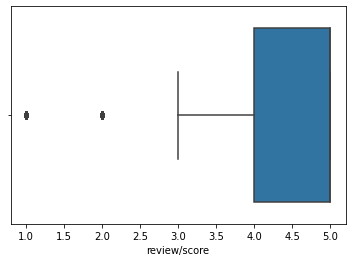

In [15]:
# PANDAS
%%time
sns.boxplot(x=pd_df['review/score'])

In [43]:
# PYSPARK
%%time
clean_ps_df.describe().show()

+-------+--------------------+--------------------+-------------------+-----------+--------------------+-----------------+--------------------+--------------------+
|summary|                  Id|               Title|            User_id|profileName|  review/helpfulness|     review/score|      review/summary|         review/text|
+-------+--------------------+--------------------+-------------------+-----------+--------------------+-----------------+--------------------+--------------------+
|  count|             2989367|             2989367|            2430524|    2430584|             2989016|          2971639|             2989367|             2989367|
|   mean| 1.056677600714743E9|  2012.9404193709436| 18.316599999999994|        NaN|1.6726640393999994E8|440.1914042217145|            Infinity| 9.923679625860465E8|
| stddev|1.2836009042101963E9|  1540.5843128432796| 22.025769381100666|        NaN| 4.227829076990005E8|751557.4538757338|                 NaN|4.2574553522703326E8|
|    min| 

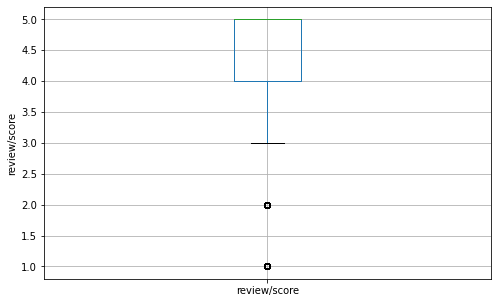

CPU times: user 1.22 s, sys: 124 ms, total: 1.34 s
Wall time: 2min 32s


In [44]:
# PYSPARK
%%time
def boxplot(df, col, samp_size=10000): 
    true_samp_size = min(samp_size/df.count(), 1.0)
    pd_df = df.sample(False, true_samp_size).toPandas()
    pd_df.boxplot(col, figsize=(8, 5))
    plt.ylabel(col)
    plt.title(None)
    plt.show()

boxplot(clean_ps_df, 'review/score')

In [80]:
# KOALAS
%%time
k_df.describe()

CPU times: user 321 ms, sys: 34 ms, total: 355 ms
Wall time: 46.6 s


review/score
count  2.981690e+06
mean   4.387228e+02
std    7.502897e+05
min    1.000000e+00
25%    4.000000e+00
50%    5.000000e+00
75%    5.000000e+00
max    1.295568e+09

In [81]:
# KOALAS
%%time
k_df['review/score'].plot.box()  

CPU times: user 902 ms, sys: 107 ms, total: 1.01 s
Wall time: 2min 2s


Based on the box plot and descriptive statistics generated, it can be obesrved that the box plot has negative skew where the median is equal to the upper quartile. Besides, the box plot only appear to have one whisker, this means that the maximum value is equal to the upper quartile. Lastly, there are outliers at the lower quartile 1.0 and 2.0.

**Distribution of Review**

In [16]:
# PANDAS
%%time
p_review = pd_df["review/score"].value_counts()
print(p_review)

5.0    1800288
4.0     583436
3.0     253722
1.0     201462
2.0     150852
Name: review/score, dtype: int64
CPU times: user 38.6 ms, sys: 1.86 ms, total: 40.5 ms
Wall time: 40.3 ms


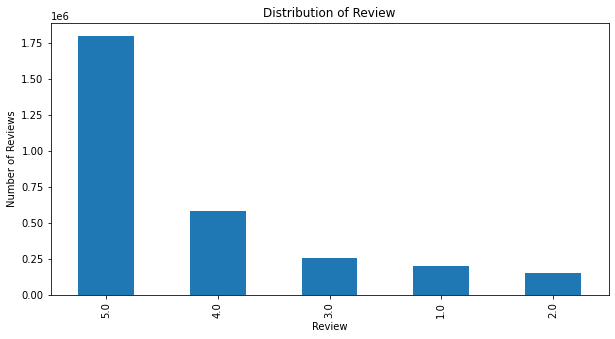

CPU times: user 201 ms, sys: 9.78 ms, total: 211 ms
Wall time: 240 ms


In [17]:
# PANDAS
%%time
p_review.plot.bar(figsize = (10,5))
plt.title("Distribution of Review")
plt.xlabel("Review")
plt.ylabel("Number of Reviews")
plt.show()

In [45]:
# PYSPARK
%%time
ps_review = clean_ps_df.groupby("review/score").count().sort(desc("count")).limit(5)
ps_review.show()

+------------+-------+
|review/score|  count|
+------------+-------+
|         5.0|1788706|
|         4.0| 579531|
|         3.0| 252367|
|         1.0| 200773|
|         2.0| 150241|
+------------+-------+

CPU times: user 415 ms, sys: 39.2 ms, total: 454 ms
Wall time: 1min 11s


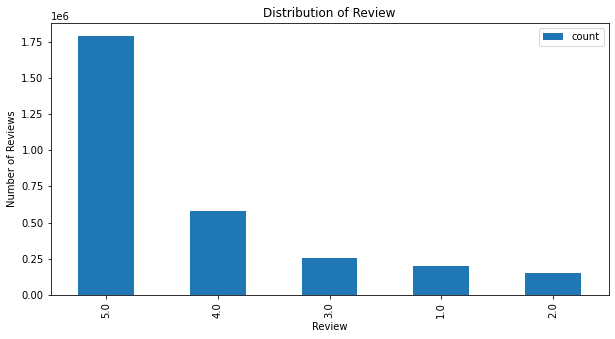

CPU times: user 652 ms, sys: 64.4 ms, total: 716 ms
Wall time: 1min 18s


In [58]:
# PYSPARK
%%time
ps_review = ps_review.toPandas()
ps_review.plot(kind='bar', x='review/score', y='count', figsize=(10,5))
plt.title("Distribution of Review")
plt.xlabel("Review")
plt.ylabel("Number of Reviews")
plt.show()

In [82]:
# KOALAS
%%time
k_review = k_df["review/score"].value_counts().head()
print(k_review)

5.0    1795611
4.0     581698
3.0     252930
1.0     200992
2.0     150438
Name: review/score, dtype: int64
CPU times: user 290 ms, sys: 32.6 ms, total: 322 ms
Wall time: 36.2 s


/usr/local/lib/python3.8/dist-packages/databricks/koalas/series.py:1525: FutureWarning:

Series.toPandas is deprecated as of Series.to_pandas. Please use the API instead.



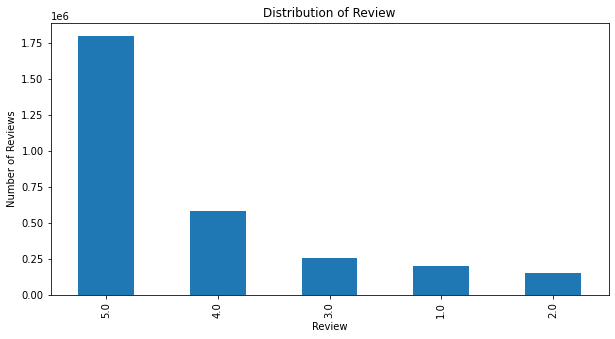

CPU times: user 389 ms, sys: 30 ms, total: 419 ms
Wall time: 34.7 s


In [83]:
# KOALAS
%%time
k_review = k_review.toPandas()
k_review.plot.bar(figsize=(10,5))
plt.title("Distribution of Review")
plt.xlabel("Review")
plt.ylabel("Number of Reviews")
plt.show()

The bar chart above shows the distribution of reviews where review score 5.0 has the most number of reviews followed by review score 4.0 having the second most number of reviews and review score 2.0 has the least number of reviews. This shows that most of the readers are satisfied and enjoy reading the books sold on Amazon.

**Top 5 Books with 1 star Review**

In [18]:
# PANDAS
%%time
low_score = pd_df.groupby('Title').mean().sort_values(ascending = True, by = 'review/score')['review/score'].head(5)
print(low_score)

Title
Feats on the fiord, (Tales for children from many lands)                                                     1.0
Guide to Computer Animation: for tv, games, multimedia and web (Focal Press Visual Effects and Animation)    1.0
The Iron Athlete Training & Fitness Journal                                                                  1.0
Guide to C# and Object Orientation                                                                           1.0
Guide to Automatic Transmissions, 1974-80 (Automobile Repair and Maintenance Series)                         1.0
Name: review/score, dtype: float64
CPU times: user 1.25 s, sys: 8.33 ms, total: 1.26 s
Wall time: 1.28 s


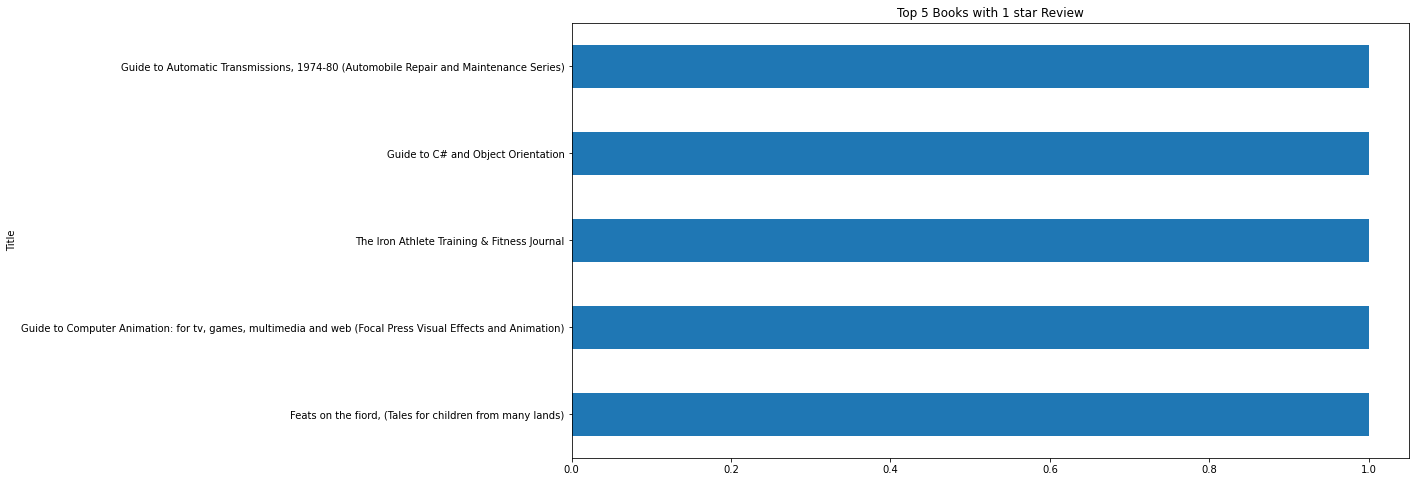

CPU times: user 252 ms, sys: 11 ms, total: 263 ms
Wall time: 286 ms


In [19]:
# PANDAS
%%time
low_score.plot(kind='barh', figsize=(15,8))
plt.title('Top 5 Books with 1 star Review')
plt.show()

In [62]:
# PYSPARK
%%time
ps_low_score = clean_ps_df.groupBy("Title").agg(avg("review/score").alias("mean_score"))
ps_low_score = ps_low_score.filter(col('mean_score') >= 1.0)
ps_low_score = ps_low_score.sort("mean_score", ascending=True).limit(5)
ps_low_score.show()

+--------------------+----------+
|               Title|mean_score|
+--------------------+----------+
|Modular Approach ...|       1.0|
|Kidstress: What I...|       1.0|
|Rutherford B Haye...|       1.0|
|The Life and Deat...|       1.0|
|Heroism of Hannah...|       1.0|
+--------------------+----------+

CPU times: user 1.39 s, sys: 125 ms, total: 1.52 s
Wall time: 3min 30s


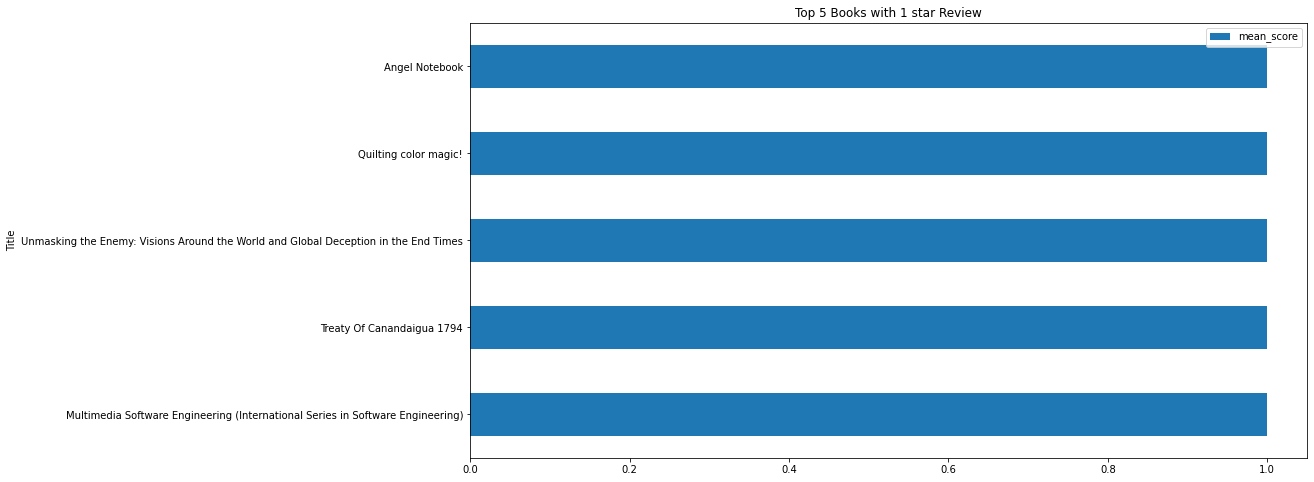

CPU times: user 248 ms, sys: 16.1 ms, total: 265 ms
Wall time: 263 ms


In [66]:
# PYSPARK
%%time
ps_low_score = ps_low_score.toPandas()
ps_low_score.plot(kind='barh', x='Title', y='mean_score', figsize=(15,8))
plt.title('Top 5 Books with 1 star Review')
plt.show()

In [84]:
# KOALAS
%%time
k_low_score = k_df.groupby('Title').mean().sort_values(ascending = True, by = 'review/score')['review/score'].head(5)
print(k_low_score)

Title
The scavengers and critics of the Warren report;: The endless paradox                       1.0
Against the Multicultural Agenda: A Critical Thinking Alternative                           1.0
The Fontana Economic History of Europe: The Industrialisation of Russia, Vol 4 Section 7    1.0
Massacre of the elephants                                                                   1.0
Assistant Train Dispatcher (Career Examination Series : C-53)                               1.0
Name: review/score, dtype: float64
CPU times: user 387 ms, sys: 47 ms, total: 434 ms
Wall time: 38.2 s


/usr/local/lib/python3.8/dist-packages/databricks/koalas/series.py:1525: FutureWarning:

Series.toPandas is deprecated as of Series.to_pandas. Please use the API instead.



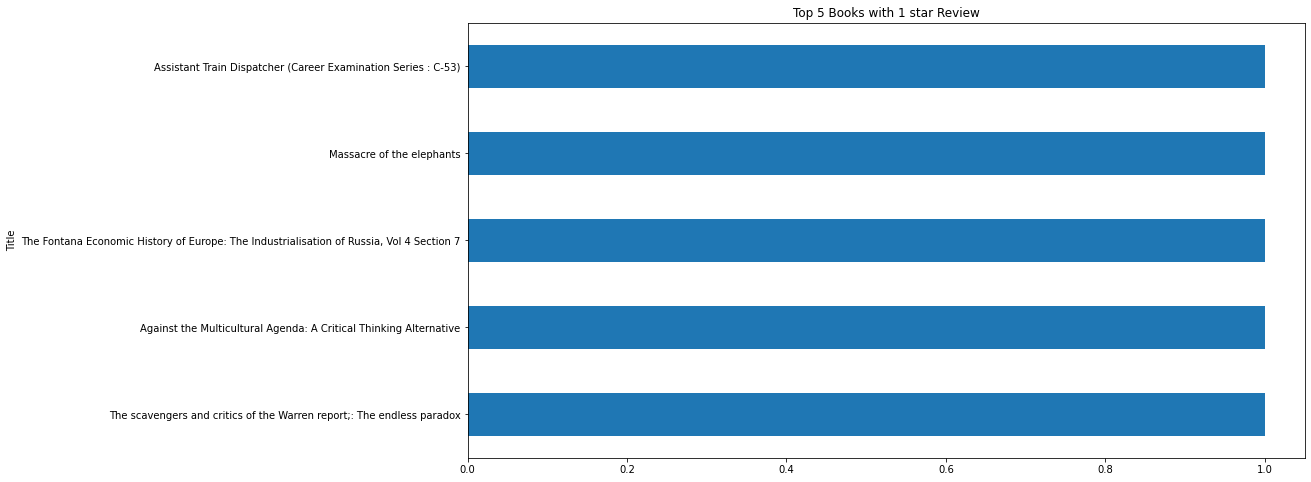

CPU times: user 475 ms, sys: 25.4 ms, total: 500 ms
Wall time: 36.1 s


In [85]:
# KOALAS
%%time
k_low_score1 = k_low_score.toPandas()
k_low_score1.plot(kind='barh', figsize=(15,8))
plt.title('Top 5 Books with 1 star Review')
plt.show()

The bar chart presents the title of top 5 books with 1 star review. This shows that the readers did not enjoy reading those books and do not recommend those books at all.

**Percentage of Books with Over 100 Reviews**

In [20]:
# PANDAS
%%time
rating_counts = pd_df['Title'].value_counts()
list_books = (rating_counts > 100).value_counts()
print(list_books)

False    208430
True       3971
Name: Title, dtype: int64
CPU times: user 518 ms, sys: 2.31 ms, total: 520 ms
Wall time: 726 ms


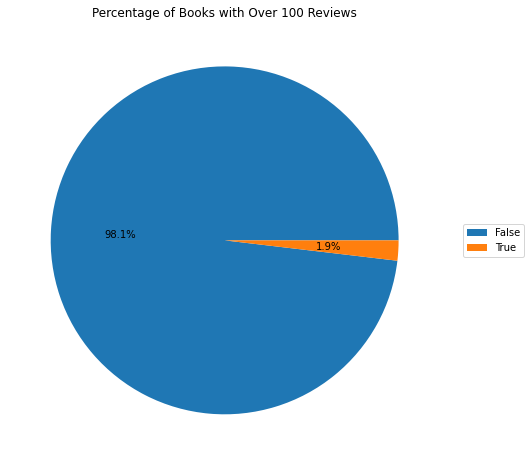

CPU times: user 234 ms, sys: 4.88 ms, total: 239 ms
Wall time: 382 ms


In [21]:
# PANDAS
%%time
plt.rcParams['figure.figsize']=(8,8)
plt.pie(list_books, autopct='%1.1f%%')
plt.legend(list_books.index, loc='right', bbox_to_anchor=(1.2,0.5))
plt.title('Percentage of Books with Over 100 Reviews')
plt.show()

In [48]:
# PYSPARK
%%time
from pyspark.sql.functions import count, desc
ps_rating_counts = clean_ps_df.groupBy('Title').agg(count("Title").alias("list_books"))
over100 = ps_rating_counts.filter(col('list_books') > 100).count()
below100 = ps_rating_counts.filter(col('list_books') <= 100).count()
print('False ',below100)
print('True ',over100)

False  208419
True  3971
CPU times: user 832 ms, sys: 88.1 ms, total: 920 ms
Wall time: 2min 26s


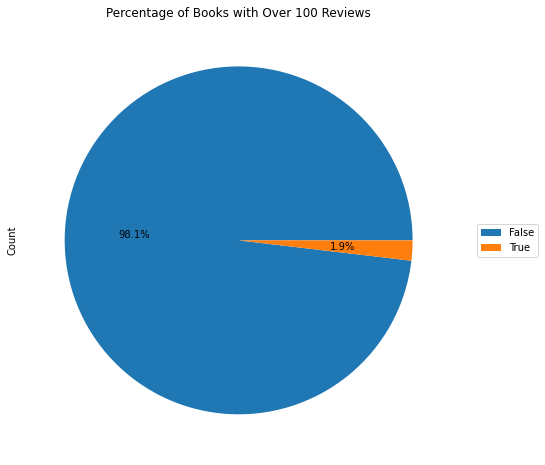

CPU times: user 186 ms, sys: 4.06 ms, total: 190 ms
Wall time: 2.09 s


In [49]:
# PYSPARK
%%time
rating_data = pd.DataFrame({'Bool':['False', 'True'],
                            'Count':[below100, over100]})
rating_df = spark.createDataFrame(rating_data)
rating_df = rating_df.toPandas()
plt.rcParams['figure.figsize']=(8,8)
rating_df.plot.pie(y='Count',autopct='%1.1f%%', labels=None)
plt.legend(rating_df['Bool'], loc='right', bbox_to_anchor=(1.2,0.5))
plt.title('Percentage of Books with Over 100 Reviews')
plt.show()


In [86]:
# KOALAS
%%time
k_rating_counts = k_df['Title'].value_counts()
k_list_books = (k_rating_counts > 100).value_counts()
print(k_list_books)

False    208407
True       3983
Name: Title, dtype: int64
CPU times: user 318 ms, sys: 34.1 ms, total: 353 ms
Wall time: 38.4 s


/usr/local/lib/python3.8/dist-packages/databricks/koalas/series.py:1525: FutureWarning:

Series.toPandas is deprecated as of Series.to_pandas. Please use the API instead.



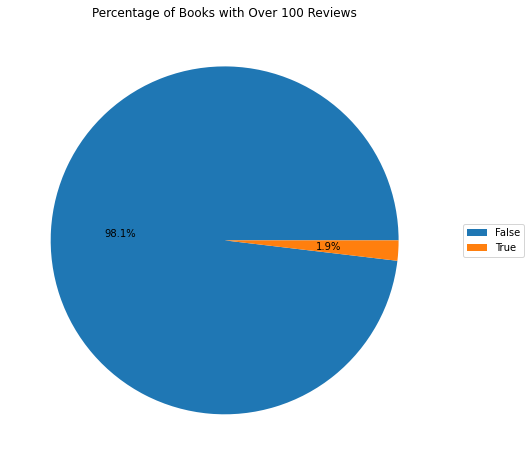

CPU times: user 451 ms, sys: 28.1 ms, total: 479 ms
Wall time: 50.7 s


In [87]:
# KOALAS
%%time
k_list_books1 = k_list_books.toPandas()
plt.rcParams['figure.figsize']=(8,8)
plt.pie(k_list_books1, autopct='%1.1f%%')
plt.legend(k_list_books1.index, loc='right', bbox_to_anchor=(1.2,0.5))
plt.title('Percentage of Books with Over 100 Reviews')
plt.show()

Based on the pie chart, most of the books have number of reviews under 100, only 1.9% of books have reviews over 100. This shows that majority readers do not have the habit to leave reviews for books after buying. 

**Helpfulness of Review Graph**

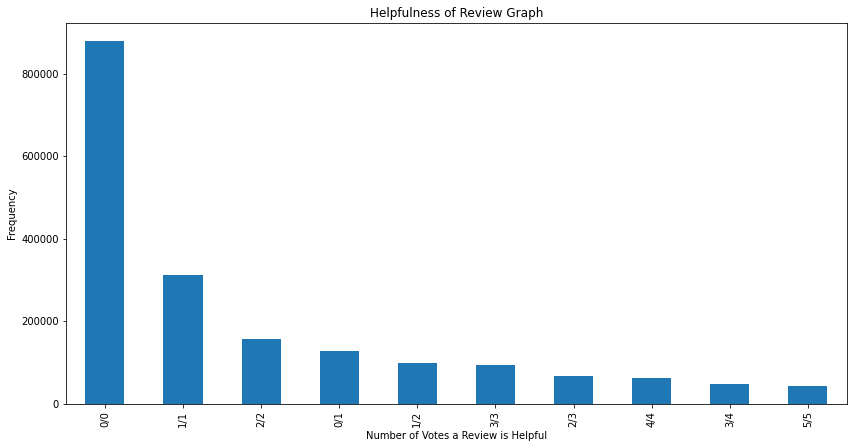

CPU times: user 420 ms, sys: 11 ms, total: 431 ms
Wall time: 439 ms


In [22]:
# PANDAS
%%time
pd_df['review/helpfulness'].value_counts().nlargest(10).plot(kind='bar', figsize=(14,7))
plt.title("Helpfulness of Review Graph")
plt.xlabel("Number of Votes a Review is Helpful")
plt.ylabel("Frequency")
plt.show()

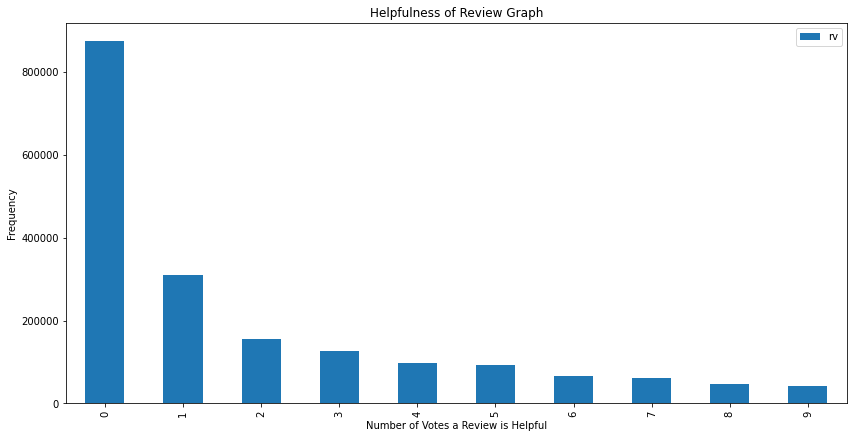

CPU times: user 748 ms, sys: 45 ms, total: 793 ms
Wall time: 1min 12s


In [50]:
# PYSPARK
%%time
from pyspark.sql.functions import count, desc
ps_help = clean_ps_df.groupBy('review/helpfulness').agg(count("review/helpfulness").alias("rv"))
ps_help = ps_help.sort(desc("rv")).limit(10)
ps_help = ps_help.toPandas()
ps_help.plot.bar(figsize = (14,7))
plt.title("Helpfulness of Review Graph")
plt.xlabel("Number of Votes a Review is Helpful")
plt.ylabel("Frequency")
plt.show()


/usr/local/lib/python3.8/dist-packages/databricks/koalas/series.py:1525: FutureWarning:

Series.toPandas is deprecated as of Series.to_pandas. Please use the API instead.



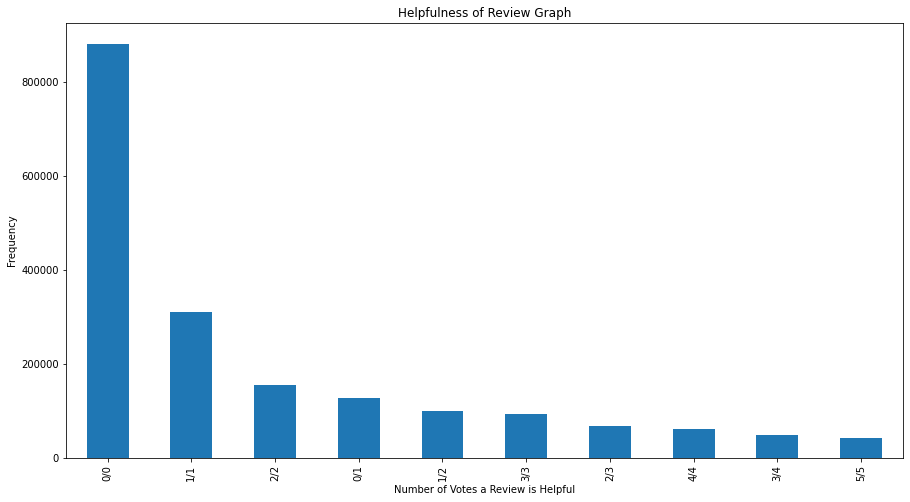

CPU times: user 539 ms, sys: 46.5 ms, total: 585 ms
Wall time: 43.8 s


In [88]:
# KOALAS
%%time
k_help = k_df['review/helpfulness'].value_counts().nlargest(10)
k_help1 = k_help.toPandas()
k_help1.plot(kind='bar', figsize=(15,8))
plt.title("Helpfulness of Review Graph")
plt.xlabel("Number of Votes a Review is Helpful")
plt.ylabel("Frequency")
plt.show()

The bar graph above shows the helpfulness rating of reviews. Apart from the 0/0 (no reviews), there are more than three hundred thousand reviews that got helpful vote only 1 time and there are less than one hundred thousand reviews that receive helpful votes 5 times. This conclude that the number of reviews decreases when the helpful votes increases as many of the reviews are irrelevant.

# **Question & Answer**

## Pandas

### Top 5 user gave the most number of review

In [23]:
%%time
user_counts = pd_df['profileName'].value_counts().head(5)
print(user_counts)

Midwest Book Review                  5767
A Customer                           5009
Harriet Klausner                     3602
E. A Solinas "ea_solinas"            2624
Shalom Freedman "Shalom Freedman"    1995
Name: profileName, dtype: int64
CPU times: user 1.61 s, sys: 8.81 ms, total: 1.62 s
Wall time: 1.62 s


### Does users who gave reviews are helpful, in general?

In [24]:
%%time
pd_helpful = pd_df[['Id', 'review/helpfulness']]
pd_helpful[['Numerator', 'Denominator']] = pd_helpful['review/helpfulness'].str.split("/",expand=True)
pd_helpful['Numerator'] = pd.to_numeric(pd_helpful['Numerator'], errors='coerce')
pd_helpful['Denominator'] = pd.to_numeric(pd_helpful['Denominator'], errors='coerce')
pd_helpful['Helpfulness'] = pd_helpful['Numerator']/pd_helpful['Denominator']
pd_helpful = pd_helpful.drop(columns=['review/helpfulness'])
pd_helpful['Helpfulness'].mean()

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
<timed exec>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


CPU times: user 8.29 s, sys: 306 ms, total: 8.6 s
Wall time: 8.64 s


<timed exec>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<timed exec>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


0.6986862646221447

***Since the average of helpfulness is more than 0.5, we consider that in general, the written reviews are helpful.***

### Top 10 books which have the most number of reviews?

In [25]:
%%time
book_review = pd_df['Title'].value_counts().head(10)
print(book_review)

The Hobbit                               21531
Pride and Prejudice                      20073
Atlas Shrugged                           12491
Wuthering Heights                        10650
The Giver                                 7572
Great Expectations                        7385
Harry Potter and The Sorcerer's Stone     6740
Of Mice and Men                           6618
Brave New World                           6294
Mere Christianity                         6021
Name: Title, dtype: int64
CPU times: user 304 ms, sys: 1.84 ms, total: 306 ms
Wall time: 306 ms


### Most frequent word in 5 rated review summary

CPU times: user 31.7 s, sys: 1.22 s, total: 32.9 s
Wall time: 33.2 s


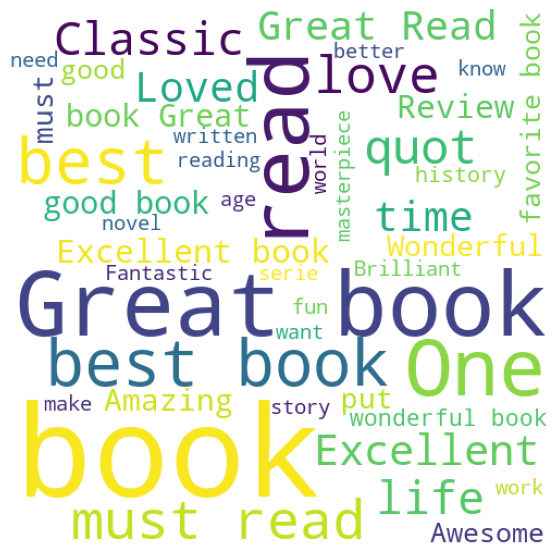

In [26]:
%%time
wc = WordCloud(width=500,height=500,min_font_size=15,background_color='white')
spam_wc = wc.generate(pd_df[pd_df['review/score'] > 4]['review/summary'].str.cat(sep=" "))

plt.figure(figsize=(20,10))
plt.axis('off')
plt.imshow(spam_wc)

### How many books which users consider as a great book ? 

(Books with review score 5 and have 'Great' word in the summary)

In [27]:
%%time
good_books = pd_df.loc[(pd_df['review/score'] == 5) & (pd_df['review/summary'].str.contains('Great', regex=False)),['Title','review/score','review/summary']]
good_books.head(5)

CPU times: user 1.23 s, sys: 6.89 ms, total: 1.24 s
Wall time: 1.24 s


Title  review/score  \
35                       Whispers of the Wicked Saints           5.0   
69                         Dramatica for Screenwriters           5.0   
77   Vector Quantization and Signal Compression (Th...           5.0   
88   The Repeal of Reticence: A History of America'...           5.0   
126                  Eyewitness Travel Guide to Europe           5.0   

                                        review/summary  
35                                          Great Read  
69                                    Armando is Great  
77                  Great reference book for its topic  
88   Great treatment of the defeat of reticence by ...  
126                   Great book for travelling Europe

In [28]:
%%time
good_books['Title'].count()

CPU times: user 11.7 ms, sys: 0 ns, total: 11.7 ms
Wall time: 14.1 ms


111963

### Which 10 books have the highest average review score?

In [29]:
%%time
book_scores = pd_df.groupby('Title')['review/score'].mean().sort_values(ascending=False)
book_scores.head(10)

CPU times: user 884 ms, sys: 2.47 ms, total: 886 ms
Wall time: 885 ms


Title
Moving Forward                                                                                                  5.0
Fuentes: Lectura y redaccion                                                                                    5.0
Fully Empowered (Spanish and English Edition)                                                                   5.0
Fully Empowered                                                                                                 5.0
Fully Armed                                                                                                     5.0
Fully Alive                                                                                                     5.0
Fullness of Forgiveness                                                                                         5.0
Fullness of Faith: The Public Significance of Theology (Isaac Hecker Studies in Religion & American Culture)    5.0
Fullerton (CA) (Images of America)                                

## PySpark

### Top 5 user gave the most number of review

In [51]:
%%time
user_counts = clean_ps_df.groupBy("profileName").count().sort(desc("count")).limit(5)
user_counts.show()

+--------------------+------+
|         profileName| count|
+--------------------+------+
|                null|558783|
| Midwest Book Review|  5763|
|          A Customer|  5007|
|    Harriet Klausner|  3602|
|"E. A Solinas ""e...|  2552|
+--------------------+------+

CPU times: user 536 ms, sys: 79.6 ms, total: 616 ms
Wall time: 1min 14s


### Does users who gave reviews are helpful, in general?



In [52]:
%%time
# Select the columns 'Id' and 'review/helpfulness'
spark_helpful = clean_ps_df.select("Id", "review/helpfulness")

# Split the 'review/helpfulness' column into 'Numerator' and 'Denominator'
spark_helpful = spark_helpful.withColumn("Numerator", split(col("review/helpfulness"), "/")[0])
spark_helpful = spark_helpful.withColumn("Denominator", split(col("review/helpfulness"), "/")[1])

# Convert the 'Numerator' and 'Denominator' columns to numeric
spark_helpful = spark_helpful.withColumn("Numerator", col("Numerator").cast("int"))
spark_helpful = spark_helpful.withColumn("Denominator", col("Denominator").cast("int"))

# Compute the 'Helpfulness' column
spark_helpful = spark_helpful.withColumn("Helpfulness", col("Numerator") / col("Denominator"))

# Drop the 'review/helpfulness' column
spark_helpful = spark_helpful.drop("review/helpfulness")

# Compute the mean of 'Helpfulness'
helpfulness_mean = spark_helpful.agg(mean("Helpfulness")).first()[0]
print("Mean Helpfulness: ", helpfulness_mean)

Mean Helpfulness:  0.698221652887351
CPU times: user 458 ms, sys: 38.3 ms, total: 497 ms
Wall time: 1min 14s


### Top 10 books which have the most number of reviews?

In [53]:
%%time
# Group the dataframe by 'Title' column and count the number of occurrences
book_review = clean_ps_df.groupBy("Title").count()

# Sort the dataframe in descending order of count
book_review = book_review.sort(desc("count"))

# Select the top 10 rows
book_review = book_review.limit(10)

# Print the dataframe
book_review.show()

+--------------------+-----+
|               Title|count|
+--------------------+-----+
|          The Hobbit|21506|
| Pride and Prejudice|20073|
|      Atlas Shrugged|12491|
|   Wuthering Heights|10650|
|           The Giver| 7570|
|  Great Expectations| 7385|
|Harry Potter and ...| 6739|
|     Of Mice and Men| 6618|
|     Brave New World| 6294|
|   Mere Christianity| 6021|
+--------------------+-----+

CPU times: user 456 ms, sys: 54.9 ms, total: 511 ms
Wall time: 1min 12s


### Most frequent word in 5 rated review summary

In [54]:
# PySpark is a library for distributed data processing and does not have the capability to generate word clouds. 
# WordCloud is a Python library that is used to generate word clouds and it is not available in PySpark.

### How many books which users consider as a great book ?

(Books with review score 5 and have 'Great' word in the summary)

In [55]:
%%time
good_books = clean_ps_df.filter((col("review/score") == 5) & (col("review/summary").rlike("Great"))).select("Title", "review/score", "review/summary")
good_books.show(5)

+--------------------+------------+--------------------+
|               Title|review/score|      review/summary|
+--------------------+------------+--------------------+
|    Romeo and Juliet|         5.0|Great Classic:Che...|
|                Dali|         5.0|GREAT Dali book ....|
|The Quick and Eas...|         5.0|Great Resource fo...|
|                1984|         5.0|Great Book for Co...|
|      Fahrenheit 451|         5.0|Great sci-fi - am...|
+--------------------+------------+--------------------+
only showing top 5 rows

CPU times: user 235 ms, sys: 21.1 ms, total: 256 ms
Wall time: 39.4 s


In [56]:
%%time
good_books.select(count("Title")).show()

+------------+
|count(Title)|
+------------+
|      111426|
+------------+

CPU times: user 231 ms, sys: 32.1 ms, total: 263 ms
Wall time: 40.9 s


### Which 10 books have the highest average review score?

In [57]:
%%time
book_scores = clean_ps_df.groupBy("Title").agg(avg("review/score").alias("average_review_score"))
book_scores = book_scores.sort("average_review_score", ascending=False)
book_scores.show(10)

+--------------------+--------------------+
|               Title|average_review_score|
+--------------------+--------------------+
|"""Shakespeare"" ...|          1.295568E9|
|Theatres of San F...|                68.8|
|"Management Secre...|  19.950000762939453|
|   God's little acre|  14.566666666666666|
|   God's Little Acre|  14.566666666666666|
|   GOD'S LITTLE ACRE|  14.566666666666666|
|Pieces of Pie: Su...|                 5.0|
|How to Stage a Pl...|                 5.0|
|The Question of L...|                 5.0|
|Locomotives Stickers|                 5.0|
+--------------------+--------------------+
only showing top 10 rows

CPU times: user 507 ms, sys: 43.7 ms, total: 550 ms
Wall time: 1min 16s


## Koalas

### Top 5 user gave the most number of review

In [89]:
%%time
user_counts = k_df.groupby('profileName').size().sort_values(ascending=False).head(5)
print(user_counts)

profileName
NaN                              562162
Midwest Book Review                5813
A Customer                         5014
Harriet Klausner                   3606
"E. A Solinas ""ea_solinas"""      3145
dtype: int64
CPU times: user 349 ms, sys: 30.7 ms, total: 379 ms
Wall time: 41.1 s


### Does users who gave reviews are helpful, in general?

In [90]:
%%time
ks_helpful = k_df[['Id', 'review/helpfulness']]
ks_helpful = ks_helpful.assign(Numerator=ks_helpful['review/helpfulness'].str.split("/").str.get(0), Denominator=ks_helpful['review/helpfulness'].str.split("/").str.get(1))
ks_helpful['Numerator'] = ks_helpful['Numerator'].astype('float')
ks_helpful['Denominator'] = ks_helpful['Denominator'].astype('float')
ks_helpful = ks_helpful.assign(Helpfulness=ks_helpful['Numerator']/ks_helpful['Denominator'])
ks_helpful = ks_helpful.drop(columns=['review/helpfulness'])
ks_helpful['Helpfulness'].mean()

/usr/local/lib/python3.8/dist-packages/pyspark/sql/pandas/functions.py:394: UserWarning:

In Python 3.6+ and Spark 3.0+, it is preferred to specify type hints for pandas UDF instead of specifying pandas UDF type which will be deprecated in the future releases. See SPARK-28264 for more details.



CPU times: user 1.12 s, sys: 132 ms, total: 1.25 s
Wall time: 2min 42s


0.6982700914047499

### Top 10 books which have the most number of reviews?

In [91]:
%%time
book_review = k_df.groupby('Title').size().sort_values(ascending=False).head(10)
print(book_review)

Title
The Hobbit                               22023
Pride and Prejudice                      20371
Atlas Shrugged                           12513
Wuthering Heights                        10780
The Giver                                 7644
Great Expectations                        7421
Harry Potter and The Sorcerer's Stone     6796
Of Mice and Men                           6728
Brave New World                           6312
Mere Christianity                         6053
dtype: int64
CPU times: user 440 ms, sys: 39.2 ms, total: 479 ms
Wall time: 47.2 s


### Most frequent word in 5 rated review summary

In [92]:
# Unfortunately, it is not possible to convert this code to Koalas, as it uses the WordCloud library, 
# which is not available in the Koalas library. Koalas is a library that provides a pandas API on top of PySpark, 
# allowing you to perform operations on large datasets using pandas-like syntax. However, it does not include functionality for creating word clouds.
# If you want to use wordcloud library then you will have to use Pandas Dataframe.

### How many books which users consider as a great book ?

(Books with review score 5 and have 'Great' word in the summary)

In [93]:
%%time
good_books = k_df[(k_df['review/score'] == 5) & (k_df['review/summary'].str.contains('Great', regex=False))][['Title','review/score','review/summary']]
good_books.head(5)

/usr/local/lib/python3.8/dist-packages/pyspark/sql/pandas/functions.py:394: UserWarning:

In Python 3.6+ and Spark 3.0+, it is preferred to specify type hints for pandas UDF instead of specifying pandas UDF type which will be deprecated in the future releases. See SPARK-28264 for more details.



CPU times: user 90.5 ms, sys: 13.8 ms, total: 104 ms
Wall time: 488 ms


Title  review/score                                          review/summary
35                                                                                                                 Whispers of the Wicked Saints           5.0                                              Great Read
69                                                                                                                   Dramatica for Screenwriters           5.0                                        Armando is Great
77                            Vector Quantization and Signal Compression (The Springer International Series in Engineering and Computer Science)           5.0                      Great reference book for its topic
88   The Repeal of Reticence: A History of America's Cultural and Legal Struggles over Free Speech, Obscenity, Sexual Liberation, and Modern Art           5.0  Great treatment of the defeat of reticence by exposure
126                                                                                                            Eyewitness Travel Guide to Europe           5.0                        Great book for travelling Europe

In [94]:
%%time
good_books['Title'].count()

CPU times: user 889 ms, sys: 99.9 ms, total: 989 ms
Wall time: 2min 23s


111722

### Which 10 books have the highest average review score?

In [95]:
%%time
book_scores = k_df.groupby('Title')['review/score'].mean().sort_values(ascending=False)
book_scores.head(10)

CPU times: user 58.8 ms, sys: 8.63 ms, total: 67.5 ms
Wall time: 546 ms


Title
"""Shakespeare"" identified in Edward De Vere                                                                            1.295568e+09
Theatres of San Francisco (CA) (Images of America)                                                                       6.880000e+01
"Management Secrets of the New England Patriots: From ""Patsies"" to two-time Super Bowl champs; Vol. 1: Achievements    1.995000e+01
God's Little Acre                                                                                                        1.456667e+01
God's little acre                                                                                                        1.456667e+01
GOD'S LITTLE ACRE                                                                                                        1.456667e+01
White Rock Ways                                                                                                          5.000000e+00
The Face of the Third Reich                             

#**Comparison Processing Time (Pandas vs PySpark vs Koalas)**

**Data Cleaning**

**Exploratory Analysis & Visualization**

In [102]:
chart = ['Chart 1', 'Chart 2', 'Chart 3', 'Chart 4', 'Chart 5']
pd_col = [0.179, 0.24, 0.286, 0.382, 0.439]
ps_col = [152, 78, 0.263, 2.09, 72]
k_col = [122, 34.7, 36.1, 50.7, 43.8]

datas = pd.DataFrame({'Pandas':pd_col, 'PySpark':ps_col, 'Koalas':k_col},index = chart)
datas

Pandas  PySpark  Koalas
Chart 1   0.179  152.000   122.0
Chart 2   0.240   78.000    34.7
Chart 3   0.286    0.263    36.1
Chart 4   0.382    2.090    50.7
Chart 5   0.439   72.000    43.8

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

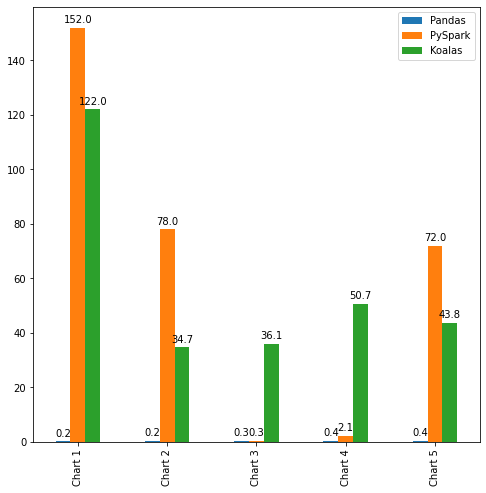

In [103]:
cx = datas.plot.bar(rot=0)
for bar in cx.patches:
  cx.annotate(format(bar.get_height(), '.1f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')
plt.xticks(rotation=90)

From the chart above, it can be observed that Pandas has the shortest processing time for all visualizations compared to PySpark and Koalas. Thus, it can be conclude that Pandas is the fastest among three libraries.

**Question & Answer**

In [104]:
index = ['Question 1', 'Question 2', 'Question 3', 'Question 4', 'Question 5', 'Question 6']
pd_col = [1.6, 8.29, 0.495, 37.2, 0.0176, 0.709]
ps_col = [73, 80, 70, 0, 33.7, 88]
k_col = [37.4, 109, 40.1, 0, 0.647, 0.309]

value = pd.DataFrame({'Pandas':pd_col, 'PySpark':ps_col, 'Koalas':k_col},index = index)
value

Pandas  PySpark   Koalas
Question 1   1.6000     73.0   37.400
Question 2   8.2900     80.0  109.000
Question 3   0.4950     70.0   40.100
Question 4  37.2000      0.0    0.000
Question 5   0.0176     33.7    0.647
Question 6   0.7090     88.0    0.309

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

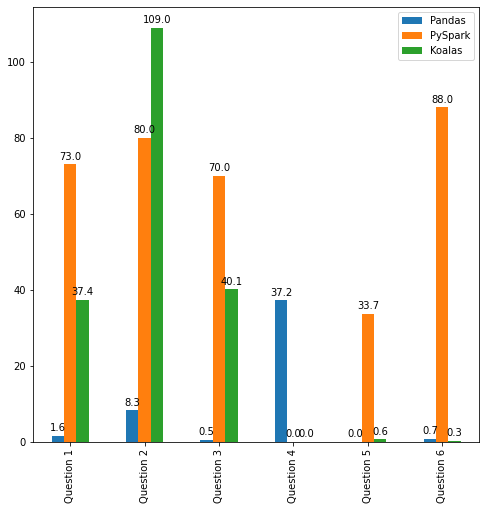

In [105]:
ax = value.plot.bar(rot=0)
for bar in ax.patches:
  ax.annotate(format(bar.get_height(), '.1f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')
plt.xticks(rotation=90)

#**Inference and Conclusion**

Pandas is a widely-used, open-source data analysis and data manipulation library for Python. It provides data structures for efficiently storing large datasets and tools for working with them. The two main data structures in Pandas are the Series (one-dimensional) and DataFrame (two-dimensional) objects. Pandas provides a range of functions for performing operations such as filtering, aggregation, and group-by operations on these structures, as well as support for reading and writing data from a variety of sources including CSV, Excel, and SQL databases. Pandas is widely used for data preparation, cleaning, and analysis in the field of data science and has a large and active community of users and contributors.

---

PySpark is the Python library for Apache Spark, an open-source, distributed computing system that enables large-scale data processing and analysis. PySpark provides a high-level API for distributed data processing using the Python programming language, allowing data scientists and engineers to leverage the power of Spark without having to write low-level code. With PySpark, you can perform distributed data processing and analysis on large datasets, taking advantage of Spark's scalability and performance. 

---

Koalas is a library for data analysis that provides a Pandas-like API on top of Apache Spark, allowing users to leverage the power of Spark while still using the familiar and convenient Pandas API. With Koalas, users can perform distributed data processing using a Pandas-like syntax, making it easier to move from single-node data processing to large-scale data processing with Spark. The goal of Koalas is to provide a seamless transition from Pandas to Spark and allow data scientists to take advantage of Spark's scalability and performance without having to learn a new API.

---
The better choice between Pandas, Koalas, and PySpark depends on the specific use case and requirements of your project. In summary, if you're working with small to medium-sized datasets and prefer a convenient API for data manipulation and analysis, Pandas may be the best choice. If you're working with large datasets and need the scalability and performance of distributed computing, PySpark is a better choice. If you're transitioning from Pandas to Spark and want a familiar API, Koalas may be the best option.

#**References and Future Work**

Future projects related to the reviews on books could use this dataset to investigate the results and predict the ratings for books sold.

**Resources**

[Pyspark plot](https://spark.apache.org/docs/latest/api/python/reference/pyspark.pandas/api/pyspark.pandas.Series.plot.box.html)<br>
[Koalas plot](https://koalas.readthedocs.io/en/latest/reference/api/databricks.koalas.DataFrame.plot.barh.html)<br>
[Pandas boxplot](https://sparkbyexamples.com/pandas/pandas-boxplot-from-dataframe/)